<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


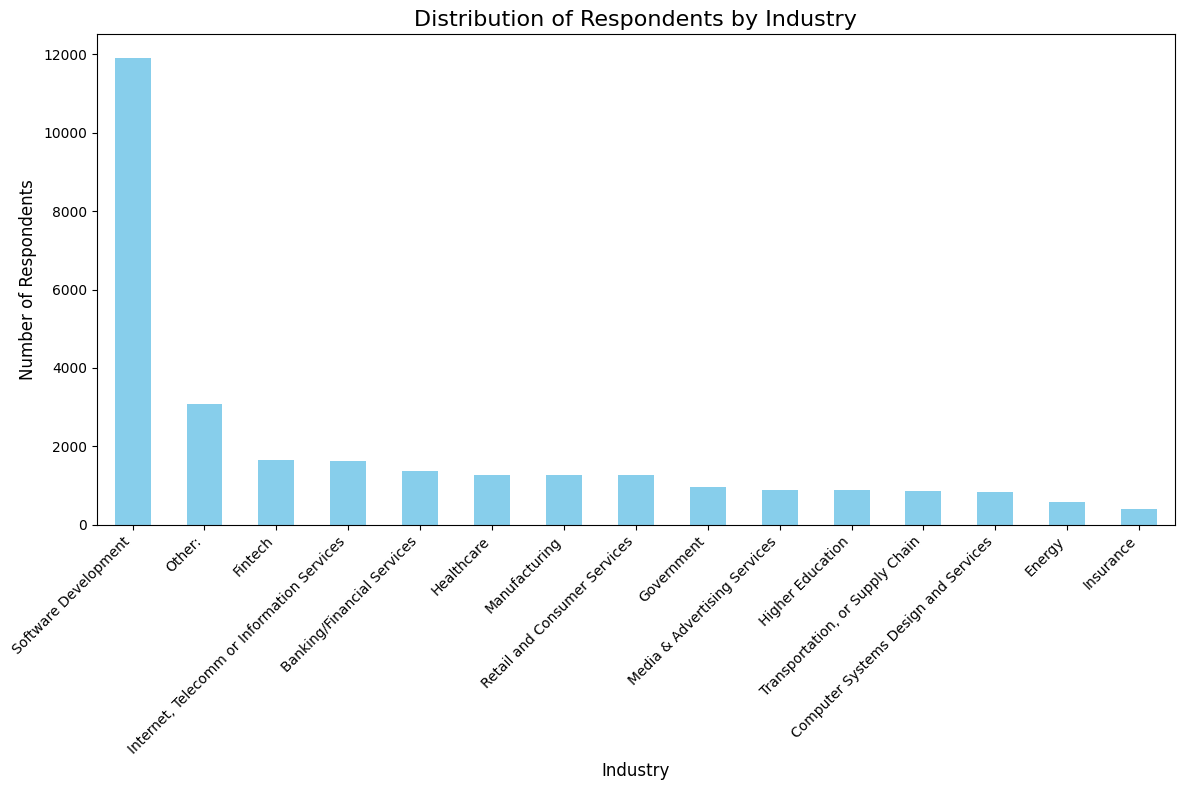

In [3]:
##Write your code here
# Step 1: Check the column names to locate the industry-related column
print(df.columns)

# Step 2: Assume the column related to industry is 'Industry' or similar
# You can replace 'Industry' with the correct column name based on the actual column list.
if 'Industry' in df.columns:
    industry_counts = df['Industry'].value_counts()
else:
    print("Column 'Industry' not found. Check column names.")

# Step 3: Plot the bar chart for industry distribution
plt.figure(figsize=(12, 8))
industry_counts.plot(kind='bar', color='skyblue')

# Step 4: Customize the plot
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


Missing values in 'ConvertedCompYearly': 42002
Mean Salary: 86155.29
Median Salary: 65000.00
Standard Deviation of Salary: 186756.97

Number of respondents with extremely high compensation: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


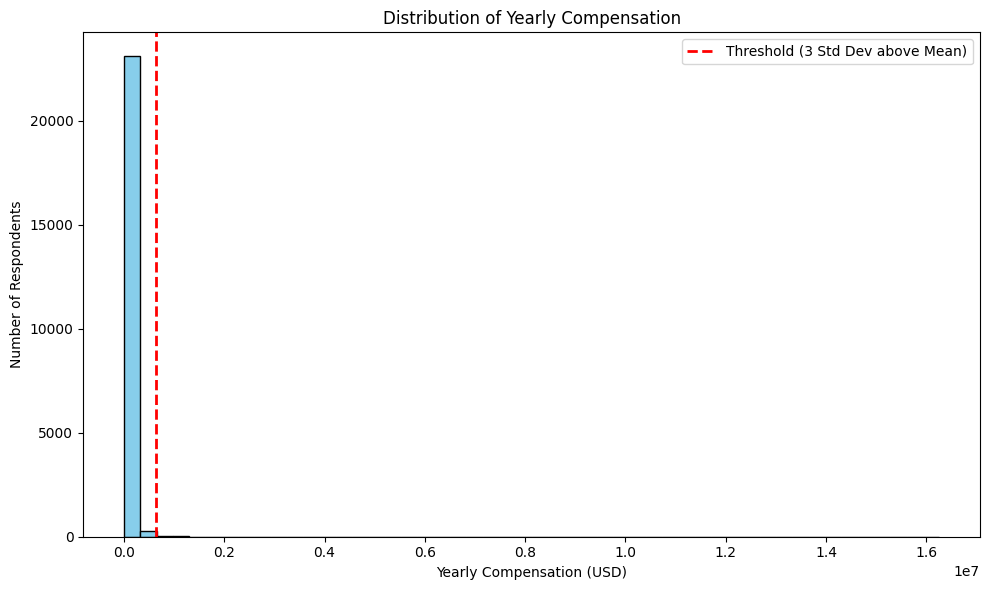

In [5]:
##Write your code here

# Step 1: Check for missing values in 'ConvertedCompYearly'
print(f"Missing values in 'ConvertedCompYearly': {df['ConvertedCompYearly'].isnull().sum()}")

# Step 2: Calculate basic statistics for 'ConvertedCompYearly'
mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Standard Deviation of Salary: {std_salary:.2f}")

# Step 3: Identify compensation values exceeding 3 standard deviations above the mean
threshold = mean_salary + 3 * std_salary

# Filter the respondents with compensation values exceeding the threshold
extremely_high_compensation = df[df['ConvertedCompYearly'] > threshold]

# Display the number of respondents with extremely high compensation and some of their data
print(f"\nNumber of respondents with extremely high compensation: {len(extremely_high_compensation)}")
print(extremely_high_compensation[['ConvertedCompYearly']].head())

# Visualize the distribution of 'ConvertedCompYearly'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold (3 Std Dev above Mean)')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend()
plt.tight_layout()
plt.show()


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers in 'ConvertedCompYearly': 978
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


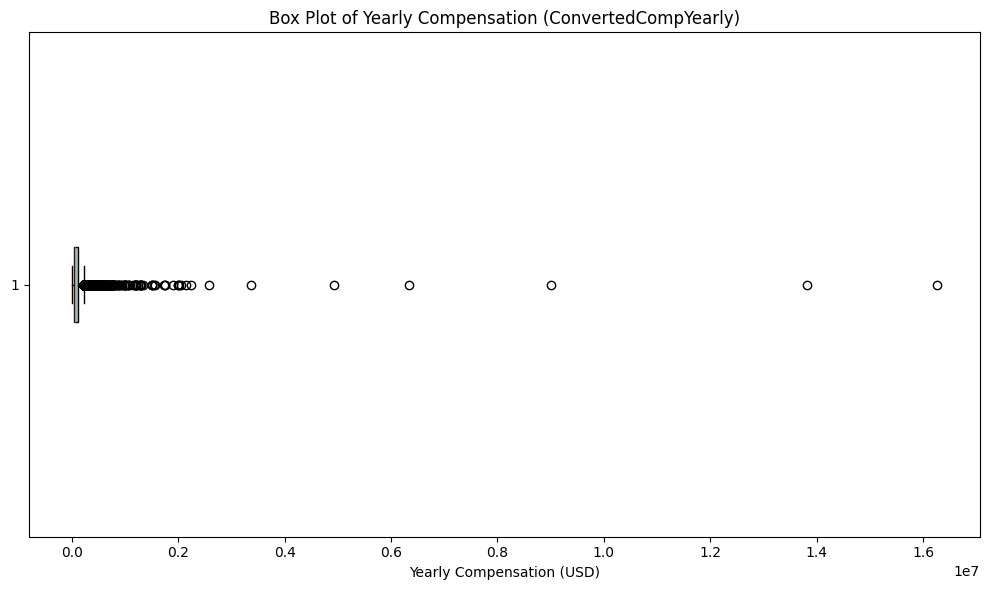

In [6]:


# Step 1: Calculate the IQR (Interquartile Range) for 'ConvertedCompYearly'
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify the outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Step 4: Count and print outliers
print(f"Number of outliers in 'ConvertedCompYearly': {len(outliers)}")
print(outliers[['ConvertedCompYearly']].head())

# Step 5: Visualize the distribution with a box plot to highlight the outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
##Write your code here

# Step 1: Calculate the IQR (Interquartile Range) for 'ConvertedCompYearly'
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove the outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")


Original DataFrame size: (65437, 114)
Cleaned DataFrame size: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [9]:
##Write your code here

# Apply the function to the 'Age' column
df['Age_numeric'] = df['Age'].apply(extract_age_numeric)

# Step 2: Compute correlations between 'Age_numeric' and other numerical columns
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Age and Other Numerical Variables')
plt.tight_layout()
plt.show()

# Display correlation between 'Age_numeric' and other numerical columns
print("Correlation between Age (numeric) and other numerical columns:")
print(correlation_matrix['Age_numeric'].sort_values(ascending=False))



ValueError: invalid literal for int() with base 10: '44 years old'

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
